# here we will now visualize all four data

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

CHEAPCARS = pd.read_csv('cheapcars.csv').to_numpy()
BUDGETCARS = pd.read_csv('budgetcars.csv').to_numpy()
MIDRANGECARS = pd.read_csv('midrangecars.csv').to_numpy()
LUXURYCARS = pd.read_csv('luxurycars.csv').to_numpy()

let's visualise mean price of each of the 4 data sets (cheapcars, budgetcars, midrangecars, luxurycars)

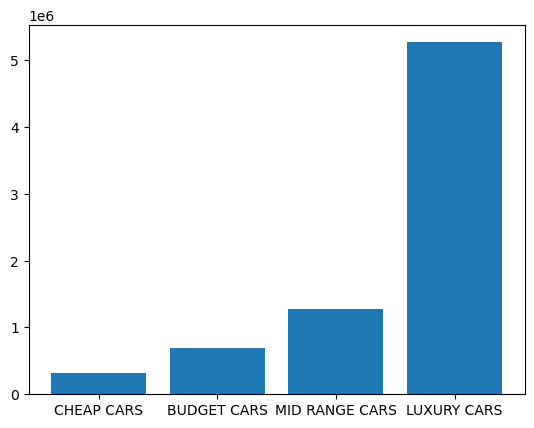

In [12]:
plt.bar(['CHEAP CARS', 'BUDGET CARS', 'MID RANGE CARS', 'LUXURY CARS'], [np.mean(CHEAPCARS[:, 8]), np.mean(BUDGETCARS[:, 8]), np.mean(MIDRANGECARS[:, 8]), np.mean(LUXURYCARS[:, 8])])
plt.show()